In [1]:
import sys
print(sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [2]:
import pandas as pd 
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [3]:
# Read data from file 'posts-100-header.csv' 
data = pd.read_csv("posts-100-header.csv") 
# Check the top 3 rows 
data.head(3)

,Id,PostTypeId,CreationDate,Score,ViewCount,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
0,5,1,2014-05-13T23:58:30.457,9,448.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,1.0,1,1.0,2014-05-14T14:40:25.950
1,7,1,2014-05-14T00:11:06.457,4,388.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,3.0,4,1.0,2014-05-14T08:40:54.950
2,9,2,2014-05-14T00:36:31.077,5,NaN,2014-05-14T00:36:31.077,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# Drop NAs from 2 columns
clean_data = data.dropna(subset=['AnswerCount', 'Score'])
# Split Tags into new rows
tag_separated = splitDataFrameList(clean_data, 'Tags', "><")
# Clean the Tags names removing '<' and '>'
tag_separated['Tags'] = tag_separated['Tags'].map(lambda x: x.lstrip('<').rstrip('>'))

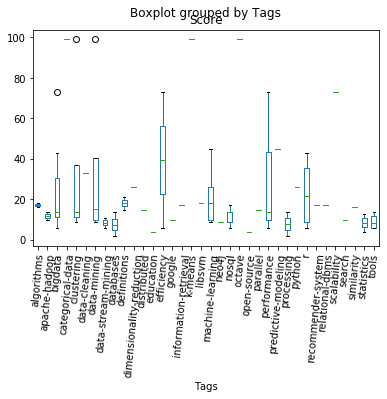

In [7]:
import matplotlib.pyplot as plt
# May take some time to display... 
tag_separated.boxplot(by='Tags', column='Score', grid=False, rot=85)
plt.show()

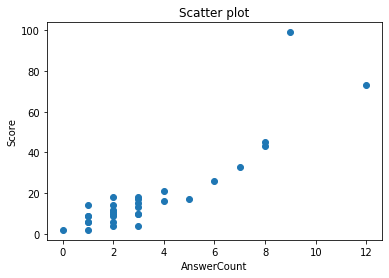

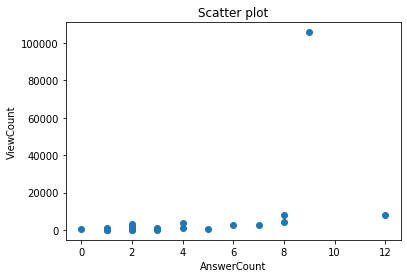

In [8]:
import matplotlib.pyplot as plt

x = clean_data['AnswerCount']
y = clean_data['Score']

# Plot AnswerCount vs ViewCounts
plt.scatter(x, y)
plt.title('Scatter plot')
plt.xlabel('AnswerCount')
plt.ylabel('Score')
plt.show()

# Plot AnswerCount vs ViewCounts
y = clean_data['ViewCount']
plt.scatter(x, y)
plt.title('Scatter plot')
plt.xlabel('AnswerCount')
plt.ylabel('ViewCount')
plt.show()
